<img src="https://upload.wikimedia.org/wikipedia/commons/7/7c/Kaggle_logo.png" align="left" height=100 width=200>

🚀 [**Kaggle - Marketing Campaign**](https://www.kaggle.com/datasets/rodsaldanha/arketing-campaign?select=marketing_campaign.csv) 🚀

# ℹ️ Readme

- The purpose of this analysis is to predict whether a customer will respond to an offer for a product or service.

# 📚 Import Libraries and Dataset

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# DATA MANIPULTION 
import pandas as pd 
import numpy as np

# DATA VIZ
import matplotlib.pyplot as plt
import seaborn as sns

# STATS
from scipy import stats
from statsmodels.graphics.gofplots import qqplot

# MACHINE LEARNING
## PREPROCESSING
from sklearn.impute import SimpleImputer, KNNImputer
## MODEL SELECTION
from sklearn.model_selection import train_test_split, cross_validate, cross_val_predict
## SCALERS
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
## CLASSIFICATION MODELS
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
## EVALUATION
from sklearn.metrics import accuracy_score, recall_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import precision_recall_curve
## MODEL TUNING
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [3]:
df = pd.read_csv('marketing_data/marketing_campaign.csv', sep=";")

In [4]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


# 🔎 Check the Dataset

In [5]:
df.shape

(2240, 29)

In [6]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [7]:
# check datatypes
df.dtypes.value_counts()

int64      25
object      3
float64     1
dtype: int64

In [8]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


# 🧹 Data Cleaning / Prep

## 👥 Duplicates

In [9]:
df.duplicated().sum()

0

## ❓ Missing Values

In [10]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

### 💸 Impute missing salaries

In [11]:
knn_imputer = KNNImputer(n_neighbors = 5)
knn_imputer.fit(df[["Income"]])
df["Income"] = knn_imputer.transform(df[["Income"]])
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

## 🧑‍🔬 Feature Engineering

### 🗓️ Change Dt_Customer from Object > DateTime > # number of days

In [12]:
# Convert Column from Object to DateTime
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

# Calculate the maximum value as the base date
base_date = df['Dt_Customer'].max()

# Calculate the number of days by subtracting the base date
df['Dt_Customer'] = (base_date - df['Dt_Customer']).dt.days

df['Dt_Customer'].head()

0    663
1    113
2    312
3    139
4    161
Name: Dt_Customer, dtype: int64

### 👶👴 Get Customer Age

In [13]:
df['Age'] = 2023 - df['Year_Birth']

### 🏫 Education

In [14]:
print("Unique values in Education column:", df['Education'].unique())

Unique values in Education column: ['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']


In [15]:
def education_level(education):
    if education in ['Graduation', 'PhD', 'Master']:
        return 1
    else:
        return 0

df['Education_Level'] = df['Education'].apply(education_level)

### 🏠 Living Conditions

In [16]:
print("Unique values in Marital_Status column:", df['Marital_Status'].unique())

Unique values in Marital_Status column: ['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']


In [17]:
def living_status(marital_status):
    if marital_status in ['Alone', 'Absurd', 'YOLO']:
        return 0
    else:
        return 1

df['Living_Status'] = df['Marital_Status'].apply(living_status)

### Number of Campaigns Accepted

In [18]:
df['Total_Campaigns_Accepted'] = df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']].sum(axis=1)

### 🔢 Average spend per purchase

In [19]:
df['Average_Spend'] = (df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)) / df['NumDealsPurchases']

### 💰 Spent

In [20]:
df['Spent'] = df['MntWines']+df["MntWines"] +df['MntFruits']+ df['MntMeatProducts'] +df['MntFishProducts']+df['MntSweetProducts']+ df['MntGoldProds']

### 👨‍👦‍👧 Parent Status

In [21]:
df['Is_Parent'] = (df['Kidhome'] + df['Teenhome'] > 0).astype(int)

### 💳 1. Total spending in the last 2 years || 2. Average monthly visits to the company's website || 3. Ratio of online purchases to total purchases

In [22]:
# create new feature for total spending in the last 2 years
df['total_spending'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

# create new feature for average monthly visits to the company's website
df['avg_web_visits'] = df['NumWebVisitsMonth'] / 12

# create new feature for the ratio of online purchases to total purchases
df['online_purchase_ratio'] = df['NumWebPurchases'] / (df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases'])

In [23]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Education_Level', 'Living_Status', 'Total_Campaigns_Accepted',
       'Average_Spend', 'Spent', 'Is_Parent', 'total_spending',
       'avg_web_visits', 'online_purchase_ratio'],
      dtype='object')

## ❌ Outliers

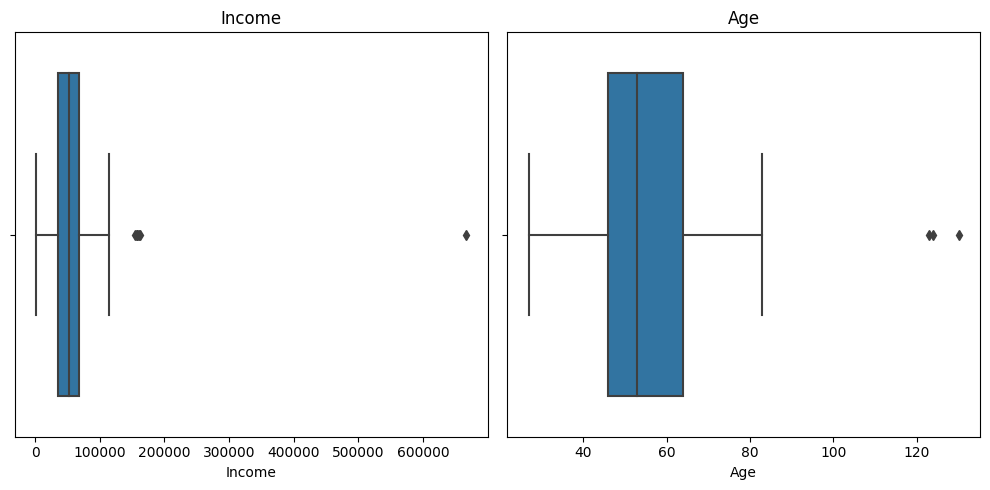

In [24]:
# Plot the distribution of a column to visualize the outliers
fig, ax = plt.subplots(1,2,figsize=(10,5))

ax[0].set_title(f"Income")
sns.boxplot(data = df, x = 'Income', ax=ax[0])

ax[1].set_title(f"Age")
sns.boxplot(data = df, x ='Age', ax=ax[1])

plt.tight_layout()
plt.show();

In [25]:
# Calculate the IQR for the Income column
Q1 = df['Income'].quantile(0.25)
Q3 = df['Income'].quantile(0.75)
IQR = Q3 - Q1

# Identify the outliers in the Income column
outliers = df[(df['Income'] < (Q1 - 1.5 * IQR)) | (df['Income'] > (Q3 + 1.5 * IQR))]

# Print the number of outliers
print("Number of outliers in the Income column:", len(outliers))

Number of outliers in the Income column: 8


In [26]:
# Remove the outliers in the Income column
df = df[~((df['Income'] < (Q1 - 1.5 * IQR)) | (df['Income'] > (Q3 + 1.5 * IQR)))]

In [27]:
# Calculate the IQR for the Age column
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1

# Identify the outliers in the Age column
outliers = df[(df['Age'] < (Q1 - 1.5 * IQR)) | (df['Age'] > (Q3 + 1.5 * IQR))]

# Print the number of outliers
print("Number of outliers in the Age column:", len(outliers))

Number of outliers in the Age column: 3


In [28]:
# Remove the outliers in the Age column
df = df[~((df['Age'] < (Q1 - 1.5 * IQR)) | (df['Age'] > (Q3 + 1.5 * IQR)))]

# 📊 Visualize Customer Demographics

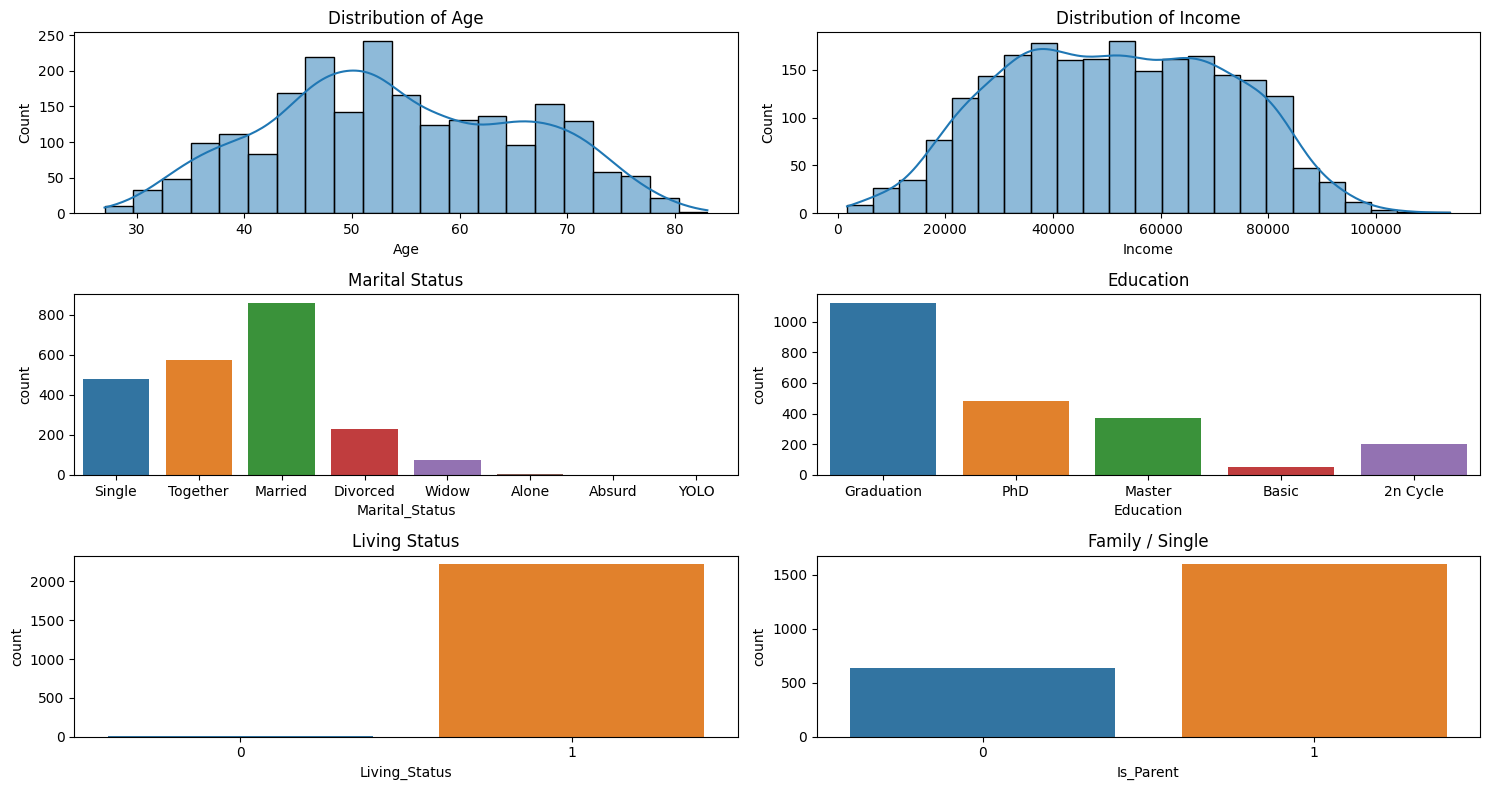

In [29]:
fig, ax = plt.subplots(3,2,figsize=(15,8))

ax[0, 0].set_title(f"Distribution of Age")
sns.histplot(data = df, x = 'Age', kde=True, ax = ax[0, 0])

ax[0, 1].set_title(f"Distribution of Income")
sns.histplot(data = df, x = 'Income', kde=True, ax=ax[0, 1]);

ax[1, 0].set_title(f"Marital Status")
sns.countplot(data = df, x = 'Marital_Status', ax=ax[1, 0])

ax[1, 1].set_title(f"Education")
sns.countplot(data = df, x = 'Education', ax=ax[1, 1])

ax[2, 0].set_title(f"Living Status")
sns.countplot(data = df, x = 'Living_Status', ax=ax[2, 0])

ax[2, 1].set_title(f"Family / Single")
sns.countplot(data = df, x = 'Is_Parent', ax=ax[2, 1])

plt.tight_layout()
plt.show();

In [30]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Education_Level', 'Living_Status', 'Total_Campaigns_Accepted',
       'Average_Spend', 'Spent', 'Is_Parent', 'total_spending',
       'avg_web_visits', 'online_purchase_ratio'],
      dtype='object')

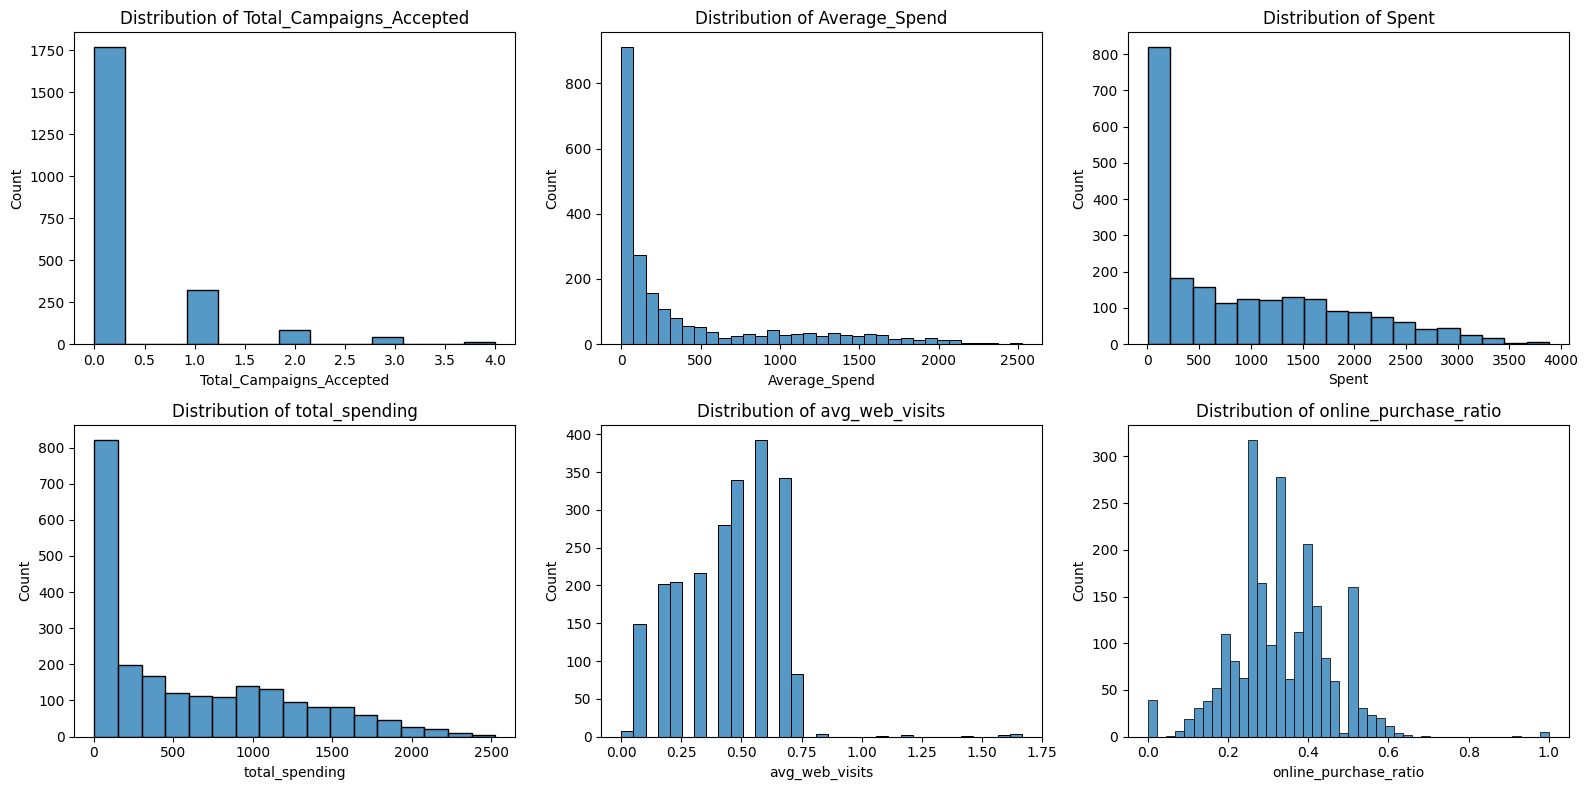

In [31]:
# check distribution of purchases, webstore visits, etc.

columns = ['Total_Campaigns_Accepted', 'Average_Spend', 'Spent',
           'total_spending', 'avg_web_visits', 'online_purchase_ratio']

fig, ax = plt.subplots(2, 3, figsize=(16, 8))

num_plots = len(columns)
num_rows = (num_plots - 1) // 3 + 1

for i, x in enumerate(columns):
    row_index = i // 3  # Row index of the subplot
    col_index = i % 3   # Column index of the subplot
    ax[row_index, col_index].set_title(f"Distribution of {x}")
    sns.histplot(data=df, x=x, ax=ax[row_index, col_index])

# Remove any empty subplots
if num_plots < num_rows * 3:
    for j in range(num_plots, num_rows * 3):
        fig.delaxes(ax[j // 3, j % 3])

plt.tight_layout()
plt.show()

## Spending Distribution by Category

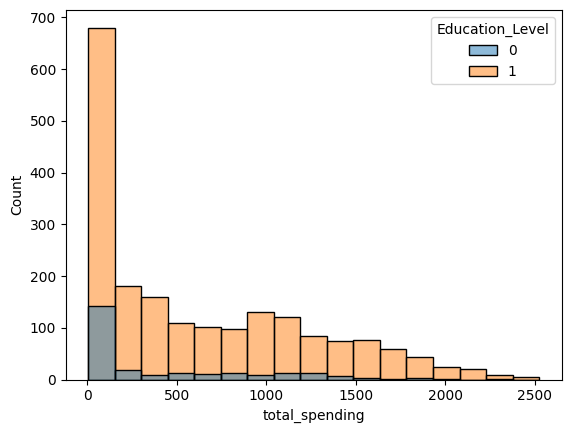

In [32]:
sns.histplot(data=df, x='total_spending', hue='Education_Level');

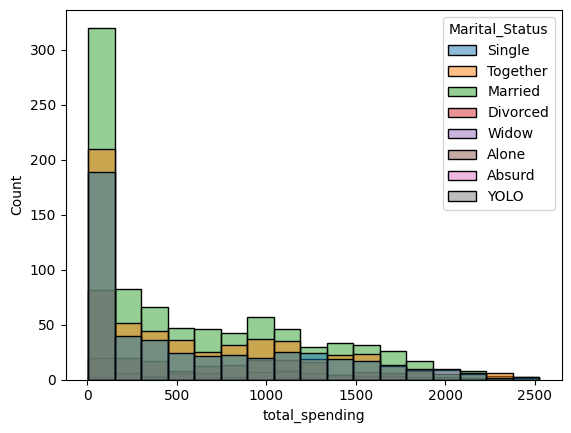

In [33]:
sns.histplot(data=df, x='total_spending', hue='Marital_Status');

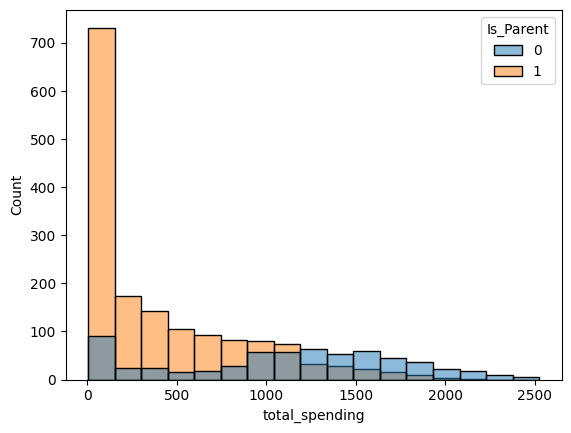

In [34]:
sns.histplot(data=df, x='total_spending', hue='Is_Parent');

## Target Distribution

In [35]:
# check what percentage of customers ignored / responded to latest campaign
df['Response'].value_counts()/df.shape[0]

0    0.850157
1    0.149843
Name: Response, dtype: float64

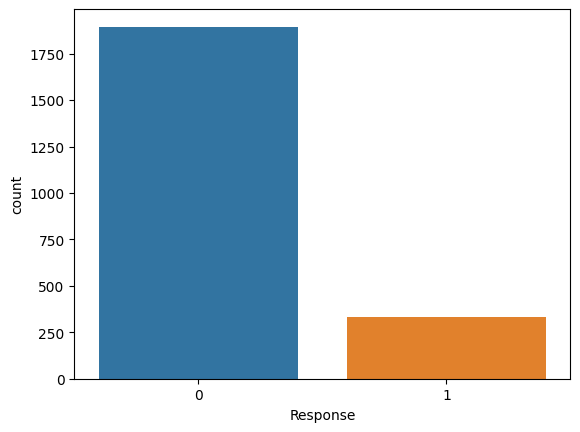

In [39]:
sns.countplot(data = df, x = 'Response');

# 🐣 Baseline Model - Most Frequent

# Pipeline

# First Model